## Traffic Violation (Part 2 - Stories)

In [1]:
#Import Statements

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the data

In [39]:
violations = pd.read_csv('Traffic_Violations.csv', dtype = 'object')
violations.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,12/20/2012,00:41:00,MCP,"2nd district, Bethesda",DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,38.9835782,-77.09310515,No,No,...,21-902(b1),Transportation Article,No,WHITE,M,DERWOOD,MD,MD,A - Marked Patrol,"(38.9835782, -77.09310515)"
2,07/20/2012,23:12:00,MCP,"5th district, Germantown",FAILURE TO STOP AT STOP SIGN,WISTERIA DR @ WARING STATION RD,39.1618098166667,-77.25358095,No,No,...,21-707(a),Transportation Article,No,ASIAN,F,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1618098166667, -77.25358095)"
3,03/19/2012,16:10:00,MCP,"2nd district, Bethesda",DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,CLARENDON RD @ ELM ST. N/,38.9827307333333,-77.1007551666667,No,No,...,21-1124.2(d2),Transportation Article,No,HISPANIC,M,ARLINGTON,VA,VA,A - Marked Patrol,"(38.9827307333333, -77.1007551666667)"
4,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.1628883333333,-77.2290883333333,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"


## Story 1 - Over the years [2012 - 2016], the increase in personal injury due to seat belt violations

In [33]:
violations_belts = violations[['Date Of Stop', 'Belts', 'Personal Injury']]

In [34]:
violations_belts.columns = violations_belts.columns.str.replace(' ', '_')

In [35]:
violation_stopdate = pd.to_datetime(violations_belts['Date_Of_Stop'])

In [36]:
violations_belts.is_copy = False
violations_belts['Year_Of_Violation'] = pd.Series(violation_stopdate.dt.year)

In [37]:
violations_year = violations_belts[violations_belts['Year_Of_Violation'] < 2017]

In [32]:
violations_year.groupby(['Year_Of_Violation','Belts'])['Personal_Injury'].value_counts()

KeyError: 'Year_Of_Violation'

In [8]:
violations_belts_injuries_group = violations_year.groupby(['Year_Of_Violation','Belts'])['Personal_Injury'].value_counts()

In [9]:
violations_belts_injuries_group = violations_belts_injuries_group.unstack()

In [10]:
violations_belts_injuries_group.reset_index(inplace = True)

In [11]:
violations_belts_injuries_pivoted = violations_belts_injuries_group.pivot(index = 'Year_Of_Violation'
                                                                          , columns = 'Belts'
                                                                          , values = 'Yes')

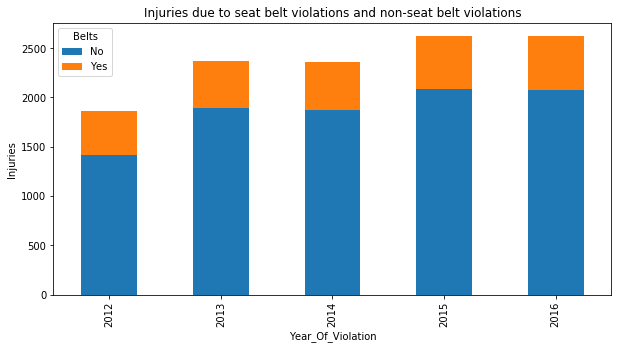

In [12]:
violations_belts_injuries_pivoted.plot(kind = 'bar', stacked = True, figsize = [10,5])
plt.title("Injuries due to seat belt violations and non-seat belt violations")
plt.ylabel("Injuries")
plt.show()

## Story 2(i) - Which part of the day see most violations

In [14]:
violations_stoptime = violations[['Time Of Stop','Date Of Stop']]

In [15]:
violations_stoptime.is_copy = False
def transform(time):
    hour = int(time[0:2])
    
    if((hour >= 0) & (hour < 6)):
        return 'Night'
    elif((hour >= 6) & (hour < 12)):
        return 'Morning'
    elif((hour >= 12) & (hour < 18)):
        return 'Afternoon'
    else:
        return 'Evening'

violations_stoptime['Parts of Day'] = violations_stoptime['Time Of Stop'].apply(transform)

In [16]:
violations_in_day = violations_stoptime['Parts of Day'].value_counts()

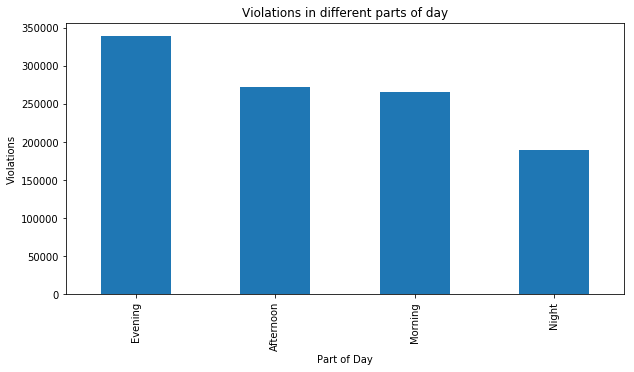

In [17]:
violations_in_day.plot(kind = 'bar', figsize = [10,5])
plt.title('Violations in different parts of day')
plt.ylabel('Violations')
plt.xlabel('Part of Day')
plt.show()

## Story 2(ii) - Over the years [2012 - 2016], violations in different parts of day

In [40]:
violation_stopdate = pd.to_datetime(violations['Date Of Stop'])
violation_stopdate.dt.year

0          2013
1          2012
2          2012
3          2012
4          2014
5          2012
6          2012
7          2012
8          2012
9          2012
10         2013
11         2013
12         2015
13         2014
14         2014
15         2014
16         2012
17         2012
18         2012
19         2013
20         2013
21         2012
22         2014
23         2015
24         2013
25         2015
26         2012
27         2013
28         2012
29         2015
           ... 
1066714    2017
1066715    2017
1066716    2017
1066717    2017
1066718    2017
1066719    2017
1066720    2017
1066721    2017
1066722    2017
1066723    2017
1066724    2017
1066725    2017
1066726    2017
1066727    2017
1066728    2017
1066729    2017
1066730    2017
1066731    2017
1066732    2017
1066733    2017
1066734    2017
1066735    2017
1066736    2017
1066737    2017
1066738    2017
1066739    2017
1066740    2017
1066741    2017
1066742    2017
1066743    2017
Name: Date Of Stop, dtyp

In [19]:
violations_stoptime.is_copy = False
violations_stoptime['Year Of Violation'] = pd.Series(violation_stopdate.dt.year)

In [25]:
violations_year = violations_stoptime[violations_stoptime['Year Of Violation'] < 2017]

In [26]:
year_time = violations_year.groupby('Year Of Violation')['Parts of Day'].value_counts()

In [27]:
year_time_unstacked = year_time.unstack()

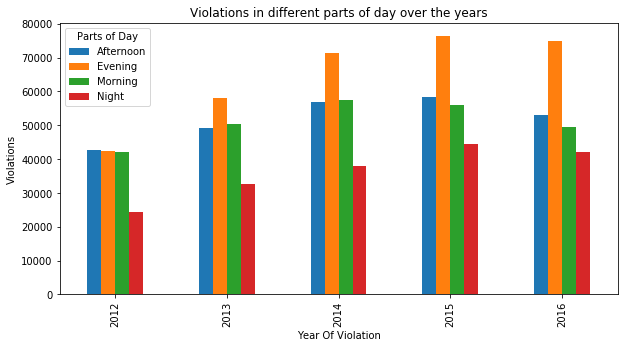

In [29]:
year_time_unstacked.plot(kind = 'bar', figsize = [10,5])
plt.title('Violations in different parts of day over the years')
plt.ylabel('Violations')
plt.show()